# ENTREGA 1 - PROYECTO KAGGLE 2025-2



In [1]:
!pip install kaggle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'

In [3]:
data = {"username":"cmosquera15","key":"4b712506b2535509650f80c6a3cd252e"}
with open('kaggle.json','w') as file:
  json.dump(data, file, indent=4)

In [4]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.55GB/s]


In [5]:
!unzip -q udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
!ls

init.py      submission_example.csv
kaggle.json  test.csv
local	     train.csv
__pycache__  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
sample_data


In [6]:
!wc -l *.csv

   296787 submission_example.csv
   296787 test.csv
   692501 train.csv
  1286075 total


In [7]:
df = pd.read_csv("train.csv")
print("Shape:", df.shape)

Shape: (692500, 21)


## Base de Datos

In [19]:
df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## 1. Distribución del rendimiento global:

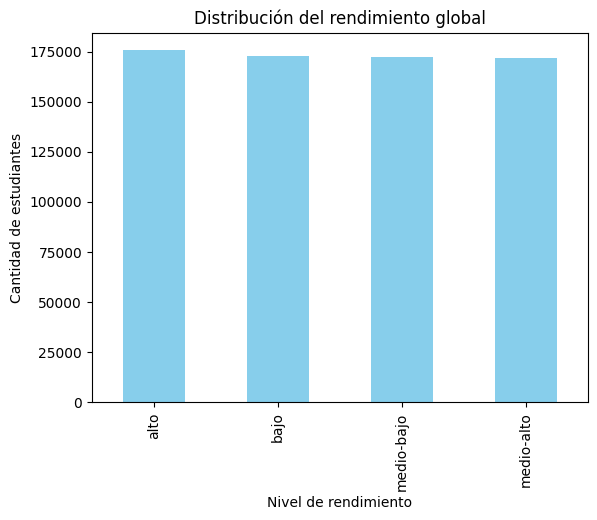

In [24]:
df["RENDIMIENTO_GLOBAL"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribución del rendimiento global")
plt.xlabel("Nivel de rendimiento")
plt.ylabel("Cantidad de estudiantes")
plt.show()

## 2. Cantidad de estudiantes por estrato socioeconómico:

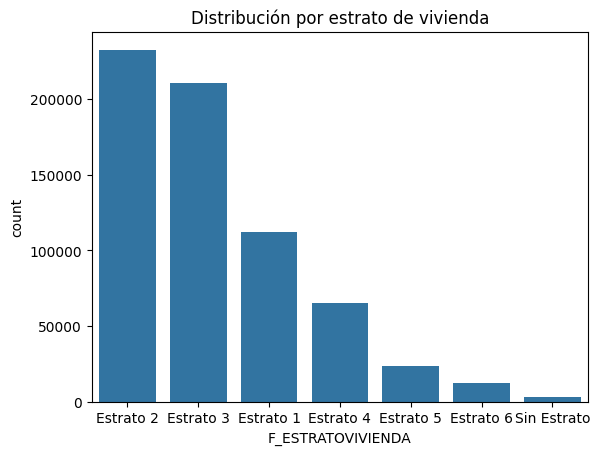

In [12]:
sns.countplot(data=df, x="F_ESTRATOVIVIENDA", order=df["F_ESTRATOVIVIENDA"].value_counts().index)
plt.title("Distribución por estrato de vivienda")
plt.show()

## 3. Promedio de rendimiento por departamento:

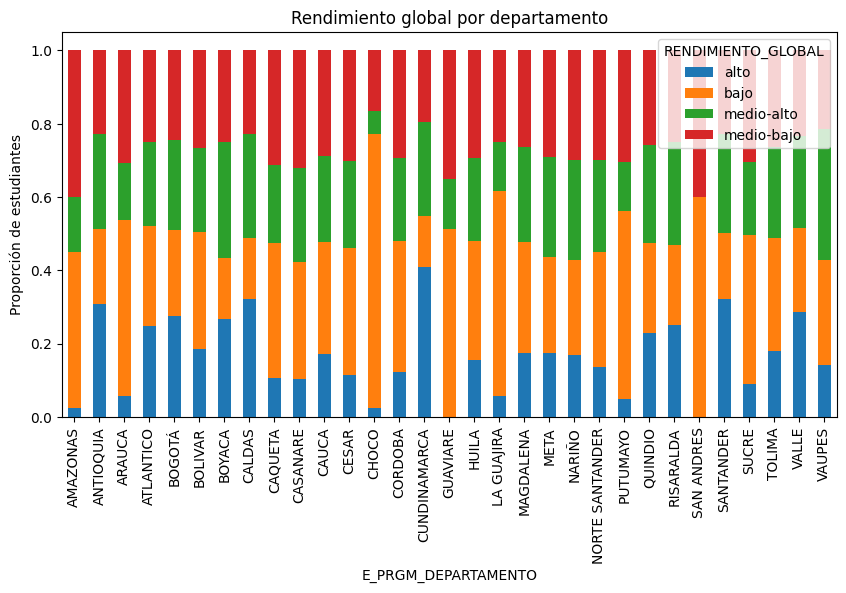

In [14]:
dep = df.groupby("E_PRGM_DEPARTAMENTO")["RENDIMIENTO_GLOBAL"].value_counts(normalize=True).unstack().fillna(0)
dep.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Rendimiento global por departamento")
plt.ylabel("Proporción de estudiantes")
plt.show()

## 4. Rendimiento según el nivel educativo de la madre:

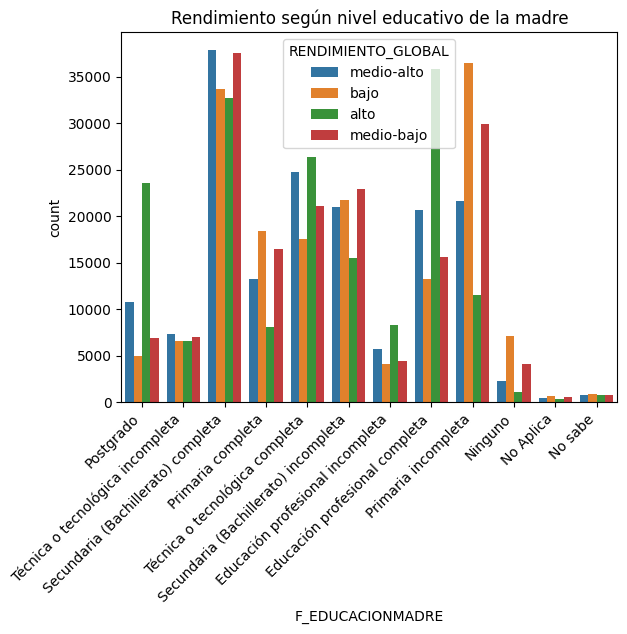

In [15]:
sns.countplot(data=df, x="F_EDUCACIONMADRE", hue="RENDIMIENTO_GLOBAL")
plt.xticks(rotation=45, ha='right')
plt.title("Rendimiento según nivel educativo de la madre")
plt.show()

## 5. Acceso a computador vs rendimiento

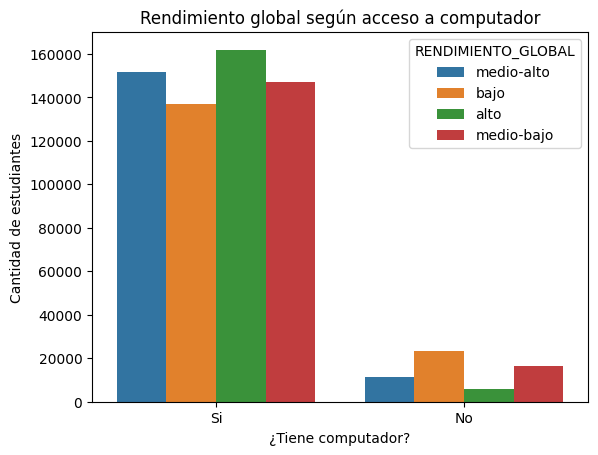

In [20]:
sns.countplot(data=df, x="F_TIENECOMPUTADOR", hue="RENDIMIENTO_GLOBAL")
plt.title("Rendimiento global según acceso a computador")
plt.xlabel("¿Tiene computador?")
plt.ylabel("Cantidad de estudiantes")
plt.show()

## 6. Acceso a internet vs rendimiento

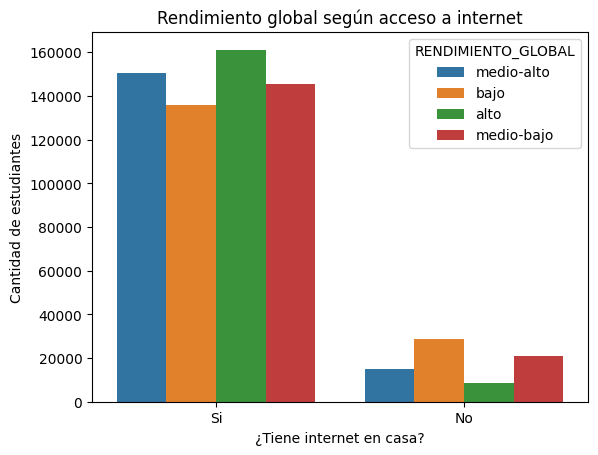

In [21]:
sns.countplot(data=df, x="F_TIENEINTERNET", hue="RENDIMIENTO_GLOBAL")
plt.title("Rendimiento global según acceso a internet")
plt.xlabel("¿Tiene internet en casa?")
plt.ylabel("Cantidad de estudiantes")
plt.show()

## 7. Horas semanales de trabajo de los estudiantes

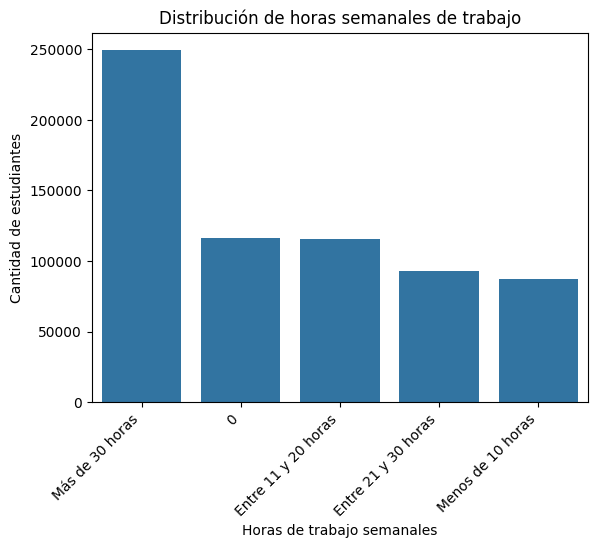

In [25]:
sns.countplot(data=df, x="E_HORASSEMANATRABAJA", order=df["E_HORASSEMANATRABAJA"].value_counts().index)
plt.title("Distribución de horas semanales de trabajo")
plt.xlabel("Horas de trabajo semanales")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=45, ha='right')
plt.show()

## 8. Programas académicos más frecuentes

/tmp/ipython-input-3119887694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_programas.values, y=top_programas.index, palette="viridis")


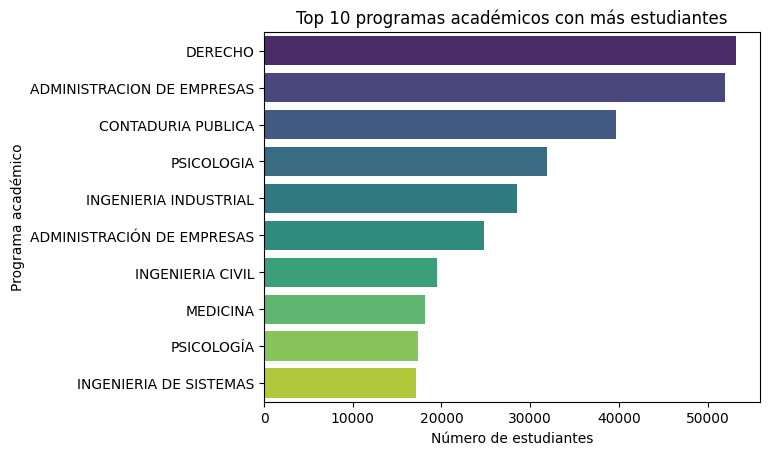

In [26]:
top_programas = df["E_PRGM_ACADEMICO"].value_counts().head(10)
sns.barplot(x=top_programas.values, y=top_programas.index, palette="viridis")
plt.title("Top 10 programas académicos con más estudiantes")
plt.xlabel("Número de estudiantes")
plt.ylabel("Programa académico")
plt.show()

## 9. Valor de matrícula vs rendimiento global

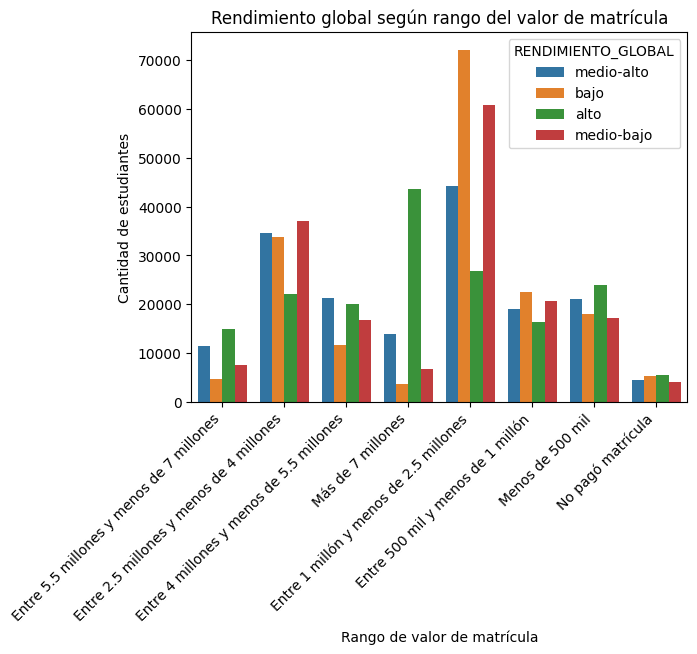

In [27]:
sns.countplot(data=df, x="E_VALORMATRICULAUNIVERSIDAD", hue="RENDIMIENTO_GLOBAL")
plt.title("Rendimiento global según rango del valor de matrícula")
plt.xlabel("Rango de valor de matrícula")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=45, ha='right')
plt.show()